<h1 align = 'center'>Understanding the Fourier Series</h1>
<h5 align = 'center'> K M Shariat Ullah <br> Student, Department of Electrical and Electronic Engineering <br> Shahjalal University of Science and Technology </h5>

Fourier series named after the French mathematician and physicist Joseph Fourier (1768-1830) is a technique to approximate/reconstruct any signal using combinations of sine waves and cosine waves and on the basis of superposition principle. For any periodic function $f(x)$ defined in interval $(-L, L)$ the Fourier series is calculated as - 

$$ f_{approx}(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos \left( \frac{n \pi x}{L} \right) + b_n \sin \left( \frac{n \pi x}{L} \right) \right) $$

Where 

$$ a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos \left( \frac{n \pi x}{L} \right) dx$$
$$ b_n = \frac{1}{L} \int_{-L}^{L} f(x) \sin \left( \frac{n \pi x}{L} \right)   $$

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.animation import FuncAnimation
from svgpathtools import svg2paths

In [67]:
def f(t):
    # this is a sine wave
    t = ((t + np.pi) % (2 * np.pi)) - np.pi
    return np.where(t < 0, -1, 1)

In [68]:
# domain
L = np.pi
N = 20  # Number of Fourier terms
t_vals = np.linspace(-L, L, 1000)
f_vals = f(t_vals)

In [69]:
# Compute a_0
a0, _ = integrate.quad(lambda t: f(t), -L, L)
a0 = a0 / L

In [70]:
# Compute a_n and b_n
a_n = []
b_n = []

In [71]:
for n in range(1, N + 1):
    an, _ = integrate.quad(lambda t: f(t) * np.cos(n * np.pi * t / L), -L, L)
    bn, _ = integrate.quad(lambda t: f(t) * np.sin(n * np.pi * t / L), -L, L)
    a_n.append(an / L)
    b_n.append(bn / L)

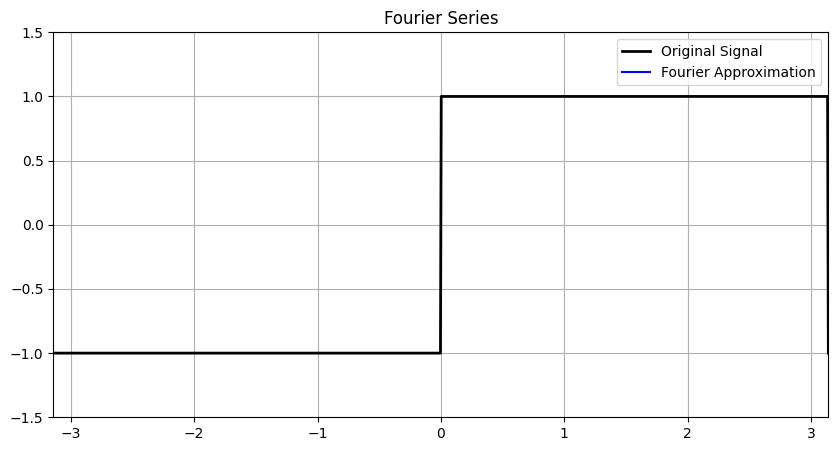

In [72]:
# Setup the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(-L, L)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Fourier Series")
ax.grid(True)

line_actual, = ax.plot(t_vals, f_vals, color='black', label='Original Signal', linewidth=2)
line_approx, = ax.plot([], [], color='blue', label='Fourier Approximation')
text_n = ax.text(0.02, 1.3, '', transform=ax.transAxes)
ax.legend()

In [73]:
# Initialization
def init():
    line_approx.set_data([], [])
    text_n.set_text('')
    return line_approx, text_n

# Animation update function
def update(n):
    y = np.full_like(t_vals, a0 / 2)
    for k in range(1, n + 1):
        y += a_n[k - 1] * np.cos(k * np.pi * t_vals / L)
        y += b_n[k - 1] * np.sin(k * np.pi * t_vals / L)
    line_approx.set_data(t_vals, y)
    text_n.set_text(f"Terms: {n}")
    return line_approx, text_n

# Create animation
anim = FuncAnimation(fig, update, frames=range(1, N + 1), init_func=init,
                     blit=True, interval=300, repeat=True)
anim.save('FourierSquare.gif')
plt.show()


The Fourier series is more convenient to write using imaginary numbers. If $f(x)$ is the function that we are trying to reconstruct then the Complex Fouries Series is -

$$ f_{approx}(x) = \sum_{n= -\infty}^{\infty}  c_n e^{i n \pi x/L} $$

Where $i = \sqrt{-1} $ and $$c_n = \frac{1}{2L} \int_{-L}^{L} f(x) e^{- i n \pi x /L}$$

In [74]:
# Compute c_n
def compute_cn(func, L, n):
    integrand = lambda x: f(x) * np.exp(-1j * n * np.pi * x / L)
    real_part, _ = integrate.quad(lambda x: integrand(x).real, -L, L)
    imag_part, _ = integrate.quad(lambda x: integrand(x).imag, -L, L)
    return (real_part + 1j * imag_part) / (2 * L)

In [75]:
# setup
L = np.pi
N = 25  # Max number of terms
x_vals = np.linspace(-L, L, 1000)
f_true = f(x_vals)

c_n_list = [compute_cn(f, L, n) for n in range(-N, N + 1)]
n_vals = np.arange(-N, N + 1)

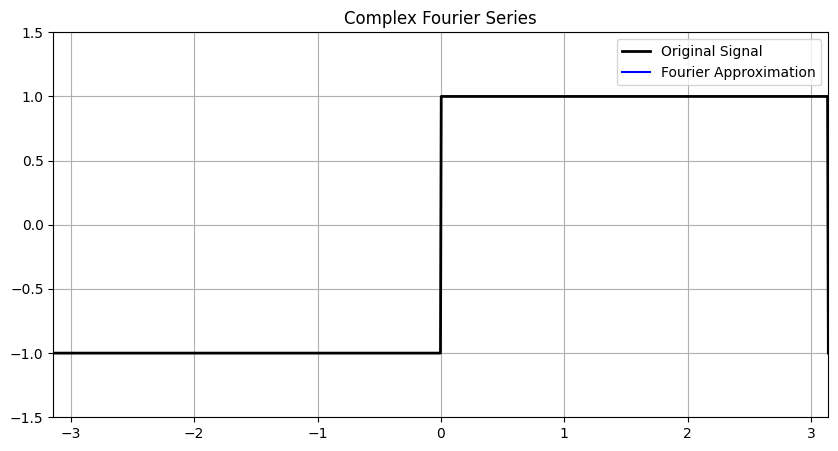

In [76]:
# initialization of the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(-L, L)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Complex Fourier Series")
ax.grid(True)

line_actual, = ax.plot(x_vals, f_true, color='black', label='Original Signal', linewidth=2)
line_approx, = ax.plot([], [], color='blue', label='Fourier Approximation')
text_n = ax.text(0.02, 1.3, '', transform=ax.transAxes)
ax.legend()

In [77]:
# animation initialization
def init():
    line_approx.set_data([], [])
    text_n.set_text('')
    return line_approx, text_n
    
# frames update
def update(frame):
    f_approx = np.zeros_like(t_vals, dtype=np.complex128)
    for i in range(-frame, frame + 1):
        idx = i + N
        f_approx += c_n_list[idx] * np.exp(1j * i * np.pi * t_vals / L)
    line_approx.set_data(t_vals, f_approx.real)
    text_n.set_text(f"Terms: {2*frame + 1}")
    return line_approx, text_n

anim = FuncAnimation(fig, update, frames=range(1, N + 1), init_func=init,
                     blit=True, interval=300, repeat=True)
anim.save('FourierSeriesComplex.gif')
plt.show()

<h3>Drawing Anything From SVG</h3>

In [78]:
def extract_points_from_svg(filename, num_points=500):
    
    paths, _ = svg2paths(filename)
    all_points = []

    for path in paths:
        for seg in path:
            for t in np.linspace(0, 1, num_points // len(path), endpoint=False):
                point = seg.point(t)
                all_points.append(point)

    points = np.array(all_points)
    points -= np.mean(points)  # center
    scale = np.max(np.abs(points))
    points /= scale  # scale to fit

    # flip 
    points = points.real - 1j * points.imag

    return points


In [79]:
# points from SVG
z = extract_points_from_svg("SUST.svg", num_points=1000)

# DFT
Z = np.fft.fft(z) / len(z)
freqs = np.fft.fftfreq(len(z), d=1/len(z))

indices = np.argsort(-np.abs(Z))
Z = Z[indices]
freqs = freqs[indices]

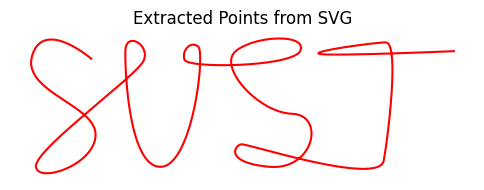

In [80]:
# Plot real vs imaginary parts
plt.figure(figsize=(6, 6))
plt.plot(z.real, z.imag, 'r-', markersize=1)
plt.gca().set_aspect('equal')
plt.title("Extracted Points from SVG")
plt.axis('off')
plt.show()

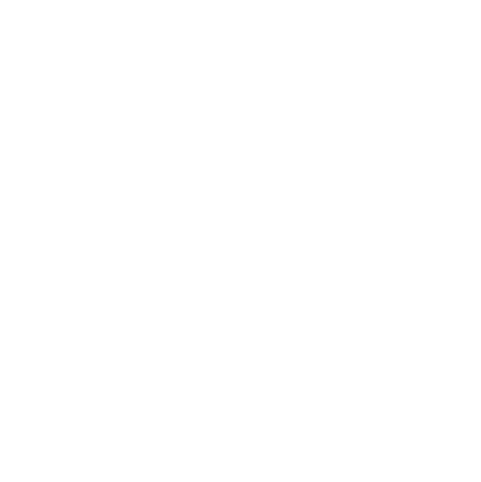

In [81]:
# animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axis('off')
line, = ax.plot([], [], 'gray', lw=1)
trail, = ax.plot([], [], 'r', lw=2)
point = ax.plot([], [], 'ro')[0]
path_points = []

def init():
    line.set_data([], [])
    trail.set_data([], [])
    point.set_data([], [])
    return line, trail, point

def update(frame):
    t = frame / len(z)
    x, y = 0, 0
    positions = [(x, y)]

    for k in range(30):  # Use top 30 epicycles 
        freq = freqs[k]
        coeff = Z[k]
        prev_x, prev_y = x, y
        x += np.real(coeff * np.exp(2j * np.pi * freq * t))
        y += np.imag(coeff * np.exp(2j * np.pi * freq * t))
        positions.append((x, y))

    xs, ys = zip(*positions)
    line.set_data(xs, ys)
    path_points.append((x, y))
    trail.set_data(*zip(*path_points))
    point.set_data([x], [y])
    return line, trail, point

frames_to_use = np.arange(0, len(z), 2)  # every 2nd frame

anim = FuncAnimation(fig, update, frames=frames_to_use, init_func=init,
                     blit=True, interval=20, repeat=True)

plt.show()


In [82]:
anim.save('sust.gif')